# Basic Scraping using API Pull

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [2]:
type(data)

dict

In [4]:
import pandas as pd
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9668,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.911944e+07,1.911944e+07,...,39.9516,4.993786e+11,None,2022-08-12T11:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-12 11:24:55.926136
1,1027,Ethereum,ETH,ethereum,5973,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.219321e+08,1.219321e+08,...,20.1184,2.288855e+11,None,2022-08-12T11:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-12 11:24:55.926136
2,825,Tether,USDT,tether,37989,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.689996e+10,6.915898e+10,...,5.8808,6.918531e+10,None,2022-08-12T11:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-12 11:24:55.926136
3,3408,USD Coin,USDC,usd-coin,5611,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.380449e+10,5.380449e+10,...,4.7276,5.379269e+10,None,2022-08-12T11:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-12 11:24:55.926136
4,1839,BNB,BNB,bnb,1063,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,...,4.5321,6.391745e+10,None,2022-08-12T11:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-12 11:24:55.926136
5,52,XRP,XRP,xrp,791,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.913922e+10,9.998937e+10,...,1.6142,3.737753e+10,None,2022-08-12T11:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-12 11:24:55.926136
6,2010,Cardano,ADA,cardano,545,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.393405e+10,3.427770e+10,...,1.5717,2.371550e+10,None,2022-08-12T11:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-12 11:24:55.926136
7,4687,Binance USD,BUSD,binance-usd,4626,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.782733e+10,1.782733e+10,...,1.5665,1.782195e+10,None,2022-08-12T11:22:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-08-12 11:24:55.926136
8,5426,Solana,SOL,solana,358,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.487072e+08,5.116169e+08,...,1.3047,2.178054e+10,None,2022-08-12T11:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-12 11:24:55.926136
9,6636,Polkadot,DOT,polkadot-new,386,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1.106168e+09,1.221391e+09,...,0.8890,1.116710e+10,None,2022-08-12T11:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-12 11:24:55.926136


In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    # if not os.path.isfile('API.csv'):
    #     df.to_csv('API.csv', header='column_names')
    # else:
    #     df.to_csv('API.csv', mode='a', header=False)


In [12]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: ignored

In [13]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,9668,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.911944e+07,1.911944e+07,...,4.993786e+11,None,2022-08-12T11:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-12 11:24:55.926136,NaT
1,1027,Ethereum,ETH,ethereum,5973,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.219321e+08,1.219321e+08,...,2.288855e+11,None,2022-08-12T11:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-12 11:24:55.926136,NaT
2,825,Tether,USDT,tether,37989,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.689996e+10,6.915898e+10,...,6.918531e+10,None,2022-08-12T11:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-12 11:24:55.926136,NaT
3,3408,USD Coin,USDC,usd-coin,5611,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.380449e+10,5.380449e+10,...,5.379269e+10,None,2022-08-12T11:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-12 11:24:55.926136,NaT
4,1839,BNB,BNB,bnb,1063,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,...,6.391745e+10,None,2022-08-12T11:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-12 11:24:55.926136,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,74,Dogecoin,DOGE,dogecoin,537,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,...,9.299689e+09,None,2022-08-12T11:36:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT,2022-08-12 11:39:06.051340
11,5805,Avalanche,AVAX,avalanche,295,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",7.200000e+08,2.849311e+08,4.042296e+08,...,2.040857e+10,None,2022-08-12T11:36:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT,2022-08-12 11:39:06.051340
12,4943,Dai,DAI,multi-collateral-dai,1154,2019-11-22T00:00:00.000Z,"[defi, stablecoin, ethereum-ecosystem, avalanc...",NaN,7.410346e+09,7.410346e+09,...,7.400621e+09,None,2022-08-12T11:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,NaT,2022-08-12 11:39:06.051340
13,3890,Polygon,MATIC,polygon,449,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, scaling, stat...",1.000000e+10,8.035304e+09,1.000000e+10,...,9.091766e+09,None,2022-08-12T11:36:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT,2022-08-12 11:39:06.051340


In [16]:


pd.set_option('display.float_format', lambda x: '%.5f' % x)

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,9668,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19119443.00000,19119443.00000,...,499378644897.76001,None,2022-08-12T11:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-12 11:24:55.926136,NaT
1,1027,Ethereum,ETH,ethereum,5973,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121932098.56150,121932098.56150,...,228885506242.59000,None,2022-08-12T11:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-12 11:24:55.926136,NaT
2,825,Tether,USDT,tether,37989,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,66899962685.04855,69158976373.96588,...,69185313318.14999,None,2022-08-12T11:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-12 11:24:55.926136,NaT
3,3408,USD Coin,USDC,usd-coin,5611,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,53804487723.63079,53804487723.63079,...,53792685575.78000,None,2022-08-12T11:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-12 11:24:55.926136,NaT
4,1839,BNB,BNB,bnb,1063,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,...,63917448163.05000,None,2022-08-12T11:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-12 11:24:55.926136,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,74,Dogecoin,DOGE,dogecoin,537,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,132670764299.89409,132670764299.89409,...,9299689058.02000,None,2022-08-12T11:36:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT,2022-08-12 11:39:06.051340
11,5805,Avalanche,AVAX,avalanche,295,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",720000000.00000,284931117.55986,404229626.49901,...,20408569716.36000,None,2022-08-12T11:36:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT,2022-08-12 11:39:06.051340
12,4943,Dai,DAI,multi-collateral-dai,1154,2019-11-22T00:00:00.000Z,"[defi, stablecoin, ethereum-ecosystem, avalanc...",NaN,7410345710.30851,7410345710.30851,...,7400620500.85000,None,2022-08-12T11:36:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,NaT,2022-08-12 11:39:06.051340
13,3890,Polygon,MATIC,polygon,449,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, scaling, stat...",10000000000.00000,8035303935.28493,10000000000.00000,...,9091766384.28000,None,2022-08-12T11:36:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT,2022-08-12 11:39:06.051340


In [17]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.69840,-3.30829,1.90805,19.84297,0.04049,-17.98331
Ethereum,-1.13026,-1.41135,10.18171,73.89835,55.90064,-5.75200
Tether,-0.00114,-0.00117,0.02665,0.11222,0.26516,0.23135
USD Coin,-0.00992,-0.01552,-0.01458,-0.01395,-0.04627,-0.04168
BNB,-1.73727,-3.35600,-0.14461,41.02837,44.76284,14.97972
XRP,-0.99051,-2.10464,-0.87987,17.46603,20.92825,-8.33243
Cardano,-1.50032,-2.48165,1.75460,22.48481,17.54994,4.28787
Binance USD,-0.00312,-0.00058,-0.04989,-0.15298,-0.05566,-0.30296
Solana,-1.22994,-3.68133,4.20656,25.40527,59.01015,-11.48200


In [18]:
df4 = df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h    -0.69840
           quote.USD.percent_change_24h   -3.30829
           quote.USD.percent_change_7d     1.90805
           quote.USD.percent_change_30d   19.84297
           quote.USD.percent_change_60d    0.04049
                                            ...   
Shiba Inu  quote.USD.percent_change_24h   -1.12614
           quote.USD.percent_change_7d     1.47300
           quote.USD.percent_change_30d   19.64632
           quote.USD.percent_change_60d   62.89223
           quote.USD.percent_change_90d    6.18885
Length: 90, dtype: float64

In [19]:
type(df4)

pandas.core.series.Series

In [20]:
df5 = df4.to_frame(name='values')
df5

values
name                                           
Bitcoin   quote.USD.percent_change_1h  -0.69840
          quote.USD.percent_change_24h -3.30829
          quote.USD.percent_change_7d   1.90805
          quote.USD.percent_change_30d 19.84297
          quote.USD.percent_change_60d  0.04049
...                                         ...
Shiba Inu quote.USD.percent_change_24h -1.12614
          quote.USD.percent_change_7d   1.47300
          quote.USD.percent_change_30d 19.64632
          quote.USD.percent_change_60d 62.89223
          quote.USD.percent_change_90d  6.18885

[90 rows x 1 columns]

In [21]:
df5.count()

values    90
dtype: int64

In [22]:
index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
df6

,values
0,-0.69840
1,-3.30829
2,1.90805
3,19.84297
4,0.04049
...,...
85,-1.12614
86,1.47300
87,19.64632
88,62.89223


In [23]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,values
0,-0.69840
1,-3.30829
2,1.90805
3,19.84297
4,0.04049
...,...
85,-1.12614
86,1.47300
87,19.64632
88,62.89223


In [25]:
df7['percent_change'] = df7['values'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,values,percent_change
0,-0.69840,-0.69840
1,-3.30829,-3.30829
2,1.90805,1.90805
3,19.84297,19.84297
4,0.04049,0.04049
...,...,...
85,-1.12614,-1.12614
86,1.47300,1.47300
87,19.64632,19.64632
88,62.89223,62.89223


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

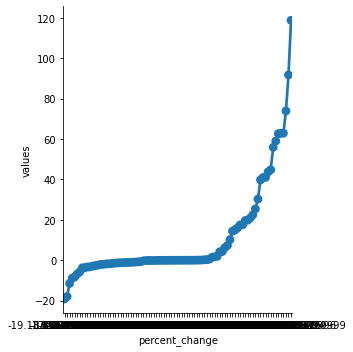

In [29]:
sns.catplot(x='percent_change', y='values', data=df7, kind='point')


In [30]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,23779.93547,2022-08-12 11:24:55.926136
0,Bitcoin,23759.09174,NaT
0,Bitcoin,23756.70664,NaT
0,Bitcoin,23734.42618,NaT
0,Bitcoin,23700.05802,NaT
0,Bitcoin,23700.05802,NaT
0,Bitcoin,23700.05802,NaT
0,Bitcoin,23700.05802,NaT
0,Bitcoin,23700.05802,NaT
0,Bitcoin,23700.05802,NaT


In [ ]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)